# Book Recommendation System

#### Summary

   - First of all we were provided with three datasets namely books,users, and ratings. We studied all datasets in that the various columns were ISBN Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S(Small) Image-URL-M(Medium), Image-URL-L(Large), User-ID, Book-Rating,Location,and Age. ISBN is International Standard Book Number.
   - Then we started with exploratory data analysis by merging all three datasets and making a new dataframe(merged_df). So we proceeded with looking for missing values and outlier detection(year, and age columns) in the given dataset. We dropped te records where negligible values were missing. For age we are interested in the age group of 5-100 years. So by considering every other value as an outliers, we converted those into null values. For age column around 26% of the values were missing. So we imputed them using random imputation.
   - We also got insights(into the relationship) by visualizing the variables using histplot,coutplot,barplot, pie chart, and distplot etc. After visualizing it, we got the insights that the majority of users did not rate the books. Also majority of the books were rated 8/10. Also the majority of the readers were in the age group of 20-45. Also the majority of users were from USA and Canada. We could see an exponential increase in the publication of books after the year 1950. The Authors who wrote the maximum no. of books were Agatha christie, and William Shakespeare. The maximum books were from the publication house Harlequin and Silhouette.
   - We started with the implementation of the model where we first used the popularity based approach using the average rating. We considered only those book which were rated atleast 250 times.
   

## Problem Statement
   During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.


## Overview about Project

  A book recommender system is a tool that suggests books to users based on their interests and reading history. These systems can be used by libraries, bookstores, or online retailers to help users discover new books that they might enjoy.
  
  This project implements a Book Recommender System designed to help users discover new books based on their preferences and interactions. The system primarily uses two recommendation strategies: popularity-based filtering and collaborative filtering.

  The goal of the system is to assist readers in exploring books they might enjoy by leveraging user behavior and book popularity.
   
   There are several challenges to building an effective book recommender system, including the need for large amounts of data to train the system, the complexity of natural language processing, and the need to balance the personalization of recommendations with the diversity of the books recommended.
   
#### Features
    
   - Popularity-based Filtering: Recommends books that are popular across all users. This method ranks books based on factors like the number of ratings and average rating, making it ideal for new users or when there is insufficient data about user preferences
   - Collaborative Filtering: Suggests books based on user interactions. This technique finds similar users or books by analyzing user-book interactions (such as ratings) and suggests books that users with similar tastes have liked. Used <b>Cosine Similarity</b> to measure the similarity between the books based on their ratings by the user.
   
   
## Dataset Description

The Book-Crossing dataset comprises 3 files

   - Users:  Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
   - Books: Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.
   - Ratings: Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np

In [14]:
books = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 27 Book Recommendation System\Books.csv")
books.head(8)

C:\Users\Aayush\AppData\Local\Temp\ipykernel_7860\501754327.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 27 Book Recommendation System\Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...


In [5]:
users = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 27 Book Recommendation System\Users.csv")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, new york, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 27 Book Recommendation System\Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Information & Description

In [7]:
# showing the basic stats of numeric features of books dataframe
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
# Description of books dataframe
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [9]:
# showing the basic info of dataframe like not_null values, columns, and datatype
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [16]:
ratings.describe(include='O')

,ISBN
count,1149780
unique,340556
top,0971880107
freq,2502


In [17]:
# basic information about users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [18]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Dataset Rows & Columns count


In [24]:
print(f'''\tSize of books data is {books.shape}
        Size of ratings data is {ratings.shape}
        Size of users data is {users.shape}''')

	Size of books data is (271360, 8)
        Size of ratings data is (1149780, 3)
        Size of users data is (278858, 3)


### Duplicates Values



In [26]:
# Checking duplicates in datasets using duplicated method of dataframe

print(books.duplicated().sum())
print(ratings.duplicated().sum())
print(users.duplicated().sum())

0
0
0


### Checking for null values

In [27]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [28]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Well, there are lot of null values in Age column. It doesn't affect our model as we won't be using it for this system.

In [29]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### Count of unique values

In [31]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [32]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [34]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

## Data Pre-processing and Cleaning

In [36]:
# merging the data frames
merged_df = pd.merge(users, ratings, on = 'User-ID') # merging users with ratings based on User-ID
merged_df = pd.merge(merged_df, books, on = 'ISBN')

merged_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, new york, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Location             1031136 non-null  object 
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Rating          1031136 non-null  int64  
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031134 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
 9   Image-URL-S          1031136 non-null  object 
 10  Image-URL-M          1031136 non-null  object 
 11  Image-URL-L          1031132 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 94.4+ MB


In [38]:
merged_df.shape

(1031136, 12)

There are 1,031,136 records and 12 columns in final dataframe

In [39]:
# total duplciated present in the data
merged_df.duplicated().sum()

0

In [40]:
# Dropping last three columns containing image URLs what are not required for the analysis
merged_df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis = 1, inplace = True)

In [43]:
# Making column names handy to use
# Replacing '-' with '_' and column name in lower case

merged_df.columns = merged_df.columns.str.replace('-','_')

merged_df.columns

Index(['User_ID', 'Location', 'Age', 'ISBN', 'Book_Rating', 'Book_Title',
       'Book_Author', 'Year_Of_Publication', 'Publisher'],
      dtype='object')

In [44]:
# Create a country column at the place of Location

merged_df['Country'] = merged_df['Location'].astype(str).apply(lambda x:x.split(',')[-1])

# Drop the location column
merged_df.drop('Location', axis = 1, inplace = True)

merged_df['Country'].unique()

array([' usa', ' canada', ' n/a', '', ' malaysia', ' spain',
       ' new zealand', ' finland', ' united kingdom', ' portugal',
       ' brazil', ' germany', ' austria', ' italy', ' netherlands',
       ' australia', ' france', ' costa rica', ' poland', ' us', ' iran',
       ' aruba', ' india', ' pakistan', ' taiwan', ' singapore',
       ' argentina', ' romania', ' greece', ' ireland', ' philippines',
       ' belgium', ' philippines"', ' mexico', ' south africa',
       ' burkina faso', ' croatia', ' switzerland', ' denmark', ' rwanda',
       ' yugoslavia', ' turkey', ' china', ' japan', ' qatar', ' latvia',
       ' sweden', ' kuwait', ' indonesia', ' nepal', ' peru',
       ' venezuela', ' south korea"', ' hong kong', ' united states',
       ' slovakia', ' norway', ' dominican republic',
       ' bosnia and herzegovina', ' south korea', ' macedonia', ' kenya',
       ' mauritius', ' catalonia', ' nigeria', ' madagascar', ' israel',
       ' oman', ' egypt', ' lithuania', ' guate

In [50]:
# fixing unknown and missing value

merged_df['Country'] = merged_df['Country'].replace('','other').replace(' n/a','other')

merged_df['Country'].unique()

array([' usa', ' canada', 'other', ' malaysia', ' spain', ' new zealand',
       ' finland', ' united kingdom', ' portugal', ' brazil', ' germany',
       ' austria', ' italy', ' netherlands', ' australia', ' france',
       ' costa rica', ' poland', ' us', ' iran', ' aruba', ' india',
       ' pakistan', ' taiwan', ' singapore', ' argentina', ' romania',
       ' greece', ' ireland', ' philippines', ' belgium', ' philippines"',
       ' mexico', ' south africa', ' burkina faso', ' croatia',
       ' switzerland', ' denmark', ' rwanda', ' yugoslavia', ' turkey',
       ' china', ' japan', ' qatar', ' latvia', ' sweden', ' kuwait',
       ' indonesia', ' nepal', ' peru', ' venezuela', ' south korea"',
       ' hong kong', ' united states', ' slovakia', ' norway',
       ' dominican republic', ' bosnia and herzegovina', ' south korea',
       ' macedonia', ' kenya', ' mauritius', ' catalonia', ' nigeria',
       ' madagascar', ' israel', ' oman', ' egypt', ' lithuania',
       ' guatemal

In [51]:
merged_df.isnull().sum()

User_ID                     0
Age                    277835
ISBN                        0
Book_Rating                 0
Book_Title                  0
Book_Author                 2
Year_Of_Publication         0
Publisher                   2
Country                     0
dtype: int64

In [52]:
merged_df.head()

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
3,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,other
4,41385,NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [54]:
# Getting unique value from 'Year_of_Publication'
merged_df['Year_Of_Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981, 0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, '2002', 1977, 1975, 1965, 1941, 1970,
       '1996', '1999', 1972, '1989', '1992', '2001', 1953, 1962, 1973,
       '2004', 1960, '1997', '2000', '0', 1954, 1966, 1920, '1998',
       '2003', 1967, 1956, 1942, 1955, 1951, 1969, 1948, '1977', '1990',
       '1986', '1994', '1982', 1963, 1964, '1995', '1959', '1988', 1950,
       '1991', '1984', 2005, 1943, '1993', '1987', '1983', '1981', 1957,
       '1972', '1980', 1937, 1940, '1965', '1970', '1979', 1930, 1923,
       1945, 1947, '1976', 1936, '1985', '1978', 1925, '1966', '1958',
       '1975', '1973', 1927, '1974', '1967', '1971', '1969', 2030, '1968',
       2011, '1960', '1964', 2020, 1939, 1926, 1938, '1961', 1911, 1904,
       1949, 1932, 1929, '1953', '1963', '1955', '1944', '1920', '1

Since we can see that book_author and publisher columns have negligible missing values, so we can drop these records which is not going to impact on overall accuracy

In [56]:
merged_df[['Book_Author','Publisher']].dropna(inplace=True)

C:\Users\Aayush\AppData\Local\Temp\ipykernel_18712\3113569220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[['Book_Author','Publisher']].dropna(inplace=True)


In [59]:
index_list = list(merged_df[(merged_df['Year_Of_Publication'] == 'DK Publishing Inc') | (merged_df['Year_Of_Publication'] == 'Gallimard')].index)

In [60]:
index_list

[906829, 913994, 946370, 946371]

In [62]:
merged_df.drop(index = index_list, inplace = True)

In [63]:
merged_df['Year_Of_Publication'] = merged_df['Year_Of_Publication'].astype('int64')
merged_df['Year_Of_Publication'].dtype 

dtype('int64')

In [64]:
merged_df.to_csv('Cleanded_data.csv', index = False)

In [65]:
merged_df.head(10)

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
3,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,other
4,41385,NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
5,67544,30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
6,85526,36.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
7,96054,29.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
8,116866,NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,other
9,123629,NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
merged_df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 27 Book Recommendation System\clean_data.csv")
merged_df.head()

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
3,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,other
4,41385,NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


<Axes: >

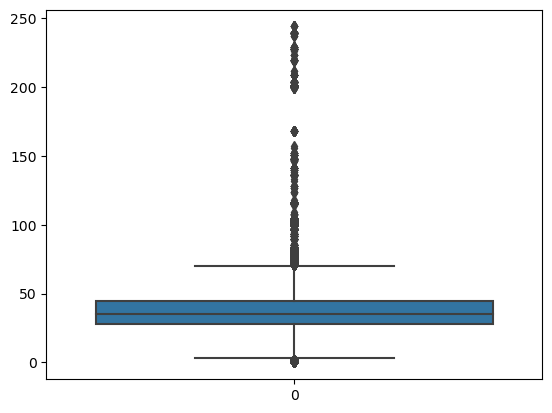

In [3]:
# Box plot for age
sns.boxplot(merged_df['Age'])

In [5]:
# Outplier data became Nan

merged_df.loc[(merged_df.Age > 100) | (merged_df.Age < 5), 'Age'] = np.nan

nulls = sum(merged_df['Age'].isnull())
print(nulls)

282467


In [6]:
# Imputitn null values

median = merged_df['Age'].median() # finding the median of Age column
std = merged_df['Age'].std()

# filling invalid and missing ages with random normal distribution numbers

random_age = np.random.randint(median - std, median + std, size = nulls)
age = merged_df['Age'].copy()
age[pd.isnull(age)] = random_age
merged_df['Age'] = age
merged_df['Age'] = merged_df['Age'].astype(int)

In [7]:
merged_df.isnull().sum()

User_ID                0
Age                    0
ISBN                   0
Book_Rating            0
Book_Title             0
Book_Author            2
Year_Of_Publication    0
Publisher              2
Country                0
dtype: int64

In [8]:
merged_df.shape

(1031132, 9)

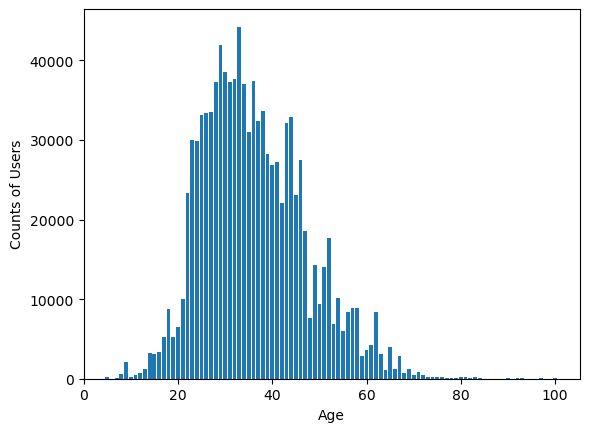

In [10]:
# Distribution of age after removing outliers and fixing missing values

ax = merged_df.Age.value_counts().sort_index()
plt.bar(ax.index, ax.values)
plt.xlabel('Age')
plt.ylabel('Counts of Users')
plt.xlim(xmin = 0)
plt.show()

C:\Users\Aayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


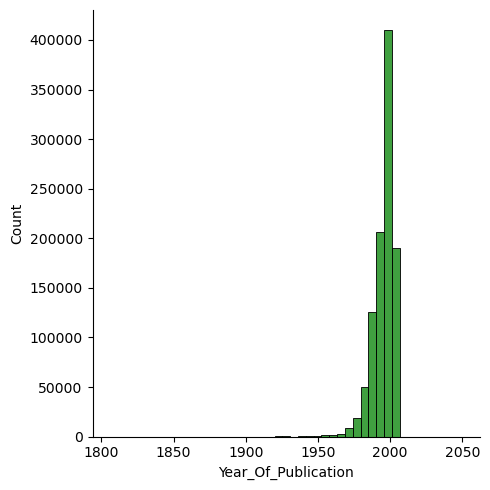

In [11]:
# showing the distribution of Year of Publication

sns.displot(merged_df[merged_df['Year_Of_Publication']> 1800]['Year_Of_Publication'],color = 'green', bins = 45)

Text(0.5, 1.0, 'Author with Most Number of Books')

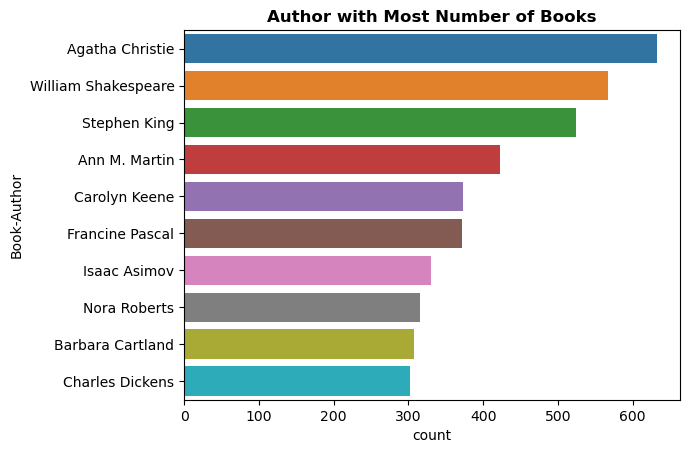

In [16]:
# plotting the count of top 10 books using countplot

sns.countplot(y='Book-Author', data = books, order = pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title("Author with Most Number of Books", fontweight = 'bold')

Text(0.5, 1.0, 'Top 10 Publishers')

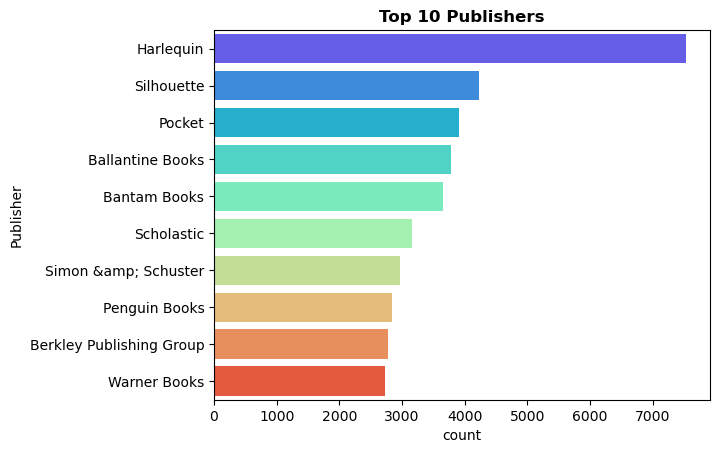

In [19]:
# Counting the top publisher using countplot 
sns.countplot(y='Publisher', data = books, order = pd.value_counts(books['Publisher']).iloc[:10].index,palette ='rainbow')
plt.title("Top 10 Publishers", fontweight = 'bold')

Text(0.5, 1.0, 'Top 5 Countries')

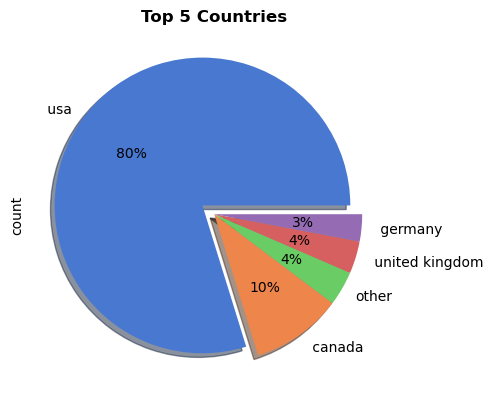

In [22]:
# Pie Graph of top five countries

palette_color = sns.color_palette('muted')
explode = (0.1,0,0,0,0)
merged_df.Country.value_counts().iloc[:5].plot(kind = 'pie', colors = palette_color, autopct = '%.0f%%', explode = explode, shadow = True)
plt.title('Top 5 Countries', fontweight = 'bold')

C:\Users\Aayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aayush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Most Famous Books')

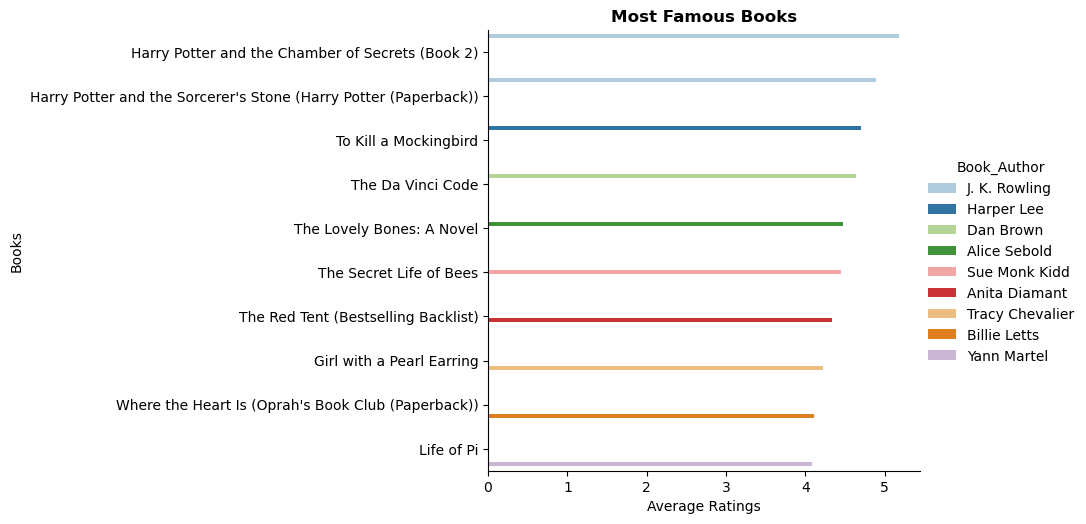

In [23]:
# Average Book rating with respect ot top 10 books

book_rating = merged_df.groupby(['Book_Title','Book_Author'])['Book_Rating'].agg(['count','mean']).sort_values(by='mean', ascending = False).reset_index()
sns.catplot(x='mean', y='Book_Title', data = book_rating[book_rating['count']>500][:10], kind = 'bar', palette = 'Paired', hue='Book_Author')
plt.xlabel('Average Ratings')
plt.ylabel('Books')
plt.title('Most Famous Books', fontweight = 'bold')

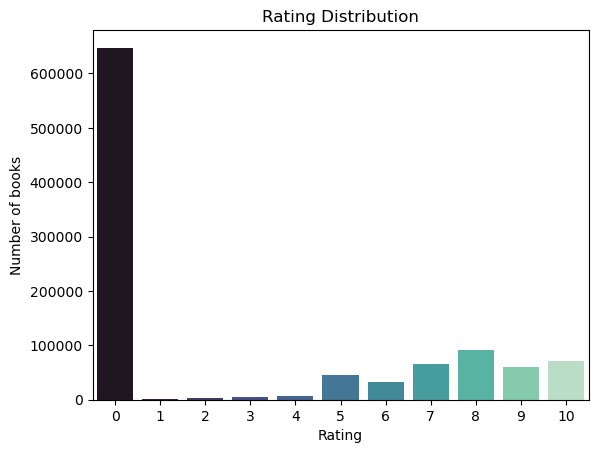

In [24]:
# barplot of book_rating with respect to its index

sns.barplot(x = merged_df['Book_Rating'].value_counts().index, y = merged_df['Book_Rating'].value_counts().values, palette = 'mako').set(title = 'Rating Distribution')
plt.xlabel("Rating")
plt.ylabel('Number of books')
plt.show()

# Recommendation System


### Populatiry Based Recommendation System

In [26]:
# Create columb average rating using groupby on book title 

merged_df['Avg_Rating'] = merged_df.groupby('Book_Title')['Book_Rating'].transform('mean')

# Create column number of rating
merged_df['No_of_Rating'] = merged_df.groupby('Book_Title')['Book_Rating'].transform('count')

# Create new dataframe popular_df

popular_df = merged_df[['Book_Title','Avg_Rating','No_of_Rating']]

popular_df.head(10)

,Book_Title,Avg_Rating,No_of_Rating
0,Classical Mythology,3.500000,2
1,Clara Callan,4.928571,14
2,Clara Callan,4.928571,14
3,Clara Callan,4.928571,14
4,Clara Callan,4.928571,14
5,Clara Callan,4.928571,14
6,Clara Callan,4.928571,14
7,Clara Callan,4.928571,14
8,Clara Callan,4.928571,14
9,Clara Callan,4.928571,14


In [28]:
# Drop duplicated books

popular_df.drop_duplicates('Book_Title', inplace = True)

popular_df.head(10)

C:\Users\Aayush\AppData\Local\Temp\ipykernel_7860\1852918294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_df.drop_duplicates('Book_Title', inplace = True)


,Book_Title,Avg_Rating,No_of_Rating
0,Classical Mythology,3.500000,2
1,Clara Callan,4.928571,14
15,Decision in Normandy,5.000000,3
18,Flu: The Story of the Great Influenza Pandemic...,4.272727,11
29,The Mummies of Urumchi,0.000000,1
30,The Kitchen God's Wife,2.996785,311
63,What If?: The World's Foremost Military Histor...,2.333333,6
68,PLEADING GUILTY,2.666667,3
71,Under the Black Flag: The Romance and the Real...,0.000000,1
72,Where You'll Find Me: And Other Stories,2.500000,2


In [30]:
popular_df.sort_values(by='No_of_Rating', ascending = False)

,Book_Title,Avg_Rating,No_of_Rating
769,Wild Animus,1.019584,2502
14986,The Lovely Bones: A Novel,4.468726,1295
65537,The Da Vinci Code,4.642539,898
20789,A Painted House,3.231504,838
49450,The Nanny Diaries: A Novel,3.530193,828
...,...,...,...
866004,Hold That Thought,0.000000,1
865998,Cliff Sheats' Lean Bodies Cookbook,0.000000,1
865992,Blue Lightning,5.000000,1
865987,You Who Know,0.000000,1


In [36]:
# Appyling a constraint of number of ratings greater than 250 to only keep the most popular books

popular_df = popular_df[popular_df['No_of_Rating']>250].sort_values(by='Avg_Rating', ascending = False)

popular_df.head(10)

,Book_Title,Avg_Rating,No_of_Rating
32601,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
33024,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
37538,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
33218,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
32080,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
167539,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281
37807,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368
125266,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575
37870,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260
4219,To Kill a Mockingbird,4.700000,510


## Collaborative Filtering

Every user's rating at facevalue can't be considered because if the users is a novice reader with only an experience of reading a couple of books, his/her rating might not be much relevant for finding similarity among books. 
Therefore as a general rule of thumb let's consider only those Users who have rated atleast 80 books and only those books which have got atleast 200   ratings.

In [37]:
x = merged_df.groupby('User_ID').count()['Book_Rating']>200

x[x]

User_ID
254       True
2276      True
2766      True
2977      True
3363      True
          ... 
274308    True
275970    True
277427    True
277639    True
278418    True
Name: Book_Rating, Length: 811, dtype: bool

In [38]:
merged_df['User_ID'].isin(x[x].index)

0          False
1          False
2          False
3           True
4          False
           ...  
1031127    False
1031128    False
1031129    False
1031130    False
1031131    False
Name: User_ID, Length: 1031132, dtype: bool

In [39]:
merged_df.shape

(1031132, 11)

In [87]:
merged_df=merged_df[merged_df['Book_Rating']!=0]

In [88]:
merged_df.shape

(383841, 11)

In [89]:
# Applying constraint on user id using it's count
x = merged_df.groupby('User_ID').count()['Book_Rating'] > 200

filtered_df = merged_df[merged_df['User_ID'].isin(x[x].index)]

In [90]:
# Applying constrain on number of rating

y = merged_df.groupby('Book_Title').count()['Book_Rating'] > 80

filtered_df = filtered_df[filtered_df['Book_Title'].isin(y[y].index)]

filtered_df.shape

(2783, 11)

In [91]:
filtered_df.head()

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country,Avg_Rating,No_of_Rating
31,11676,35,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,other,2.996785,311
34,46398,37,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,2.996785,311
54,230522,52,0399135782,7,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,2.996785,311
106,7346,49,0440234743,9,The Testament,John Grisham,1999,Dell,usa,3.179903,617
112,11676,35,0440234743,9,The Testament,John Grisham,1999,Dell,other,3.179903,617


In [92]:
pt = filtered_df.pivot_table(index = 'Book_Title', columns = 'User_ID', values = 'Book_Rating').fillna(0)
pt

User_ID,4385,6251,6575,7346,11676,13552,16634,16795,23768,23872,...,257204,258185,261829,262998,264321,265115,265889,269566,270713,274061
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,8.0,10.0,0.0,0.0,8.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,...,0.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,1.0,0.0,6.5,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wild Animus,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wish You Well,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# create an object of soine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [93]:
similarity_scores = cosine_similarity(pt)

similarity_scores

array([[1.        , 0.32517147, 0.08926721, ..., 0.16003585, 0.30739714,
        0.17540409],
       [0.32517147, 1.        , 0.35409148, ..., 0.19923131, 0.14610385,
        0.18332756],
       [0.08926721, 0.35409148, 1.        , ..., 0.08768148, 0.07590988,
        0.24140641],
       ...,
       [0.16003585, 0.19923131, 0.08768148, ..., 1.        , 0.        ,
        0.        ],
       [0.30739714, 0.14610385, 0.07590988, ..., 0.        , 1.        ,
        0.07791827],
       [0.17540409, 0.18332756, 0.24140641, ..., 0.        , 0.07791827,
        1.        ]])

In [94]:
def recommend(book_name):
    #index fetching of the provided book
    index = np.where(pt.index == book_name)[0][0]
    #extracting top 7 items with the highest similarity scores in descending order
    similar_items = sorted(list(enumerate(similarity_scores[index])),key = lambda x:x[1], reverse = True)[1:7]
    #displaying the extracted item Book-title
    print("\n-----------------------Recommended Books---------------------------\n")
    for i in similar_items:
        print(pt.index[i[0]])
    print("\n-------------------------------------------------------------------\n")    
    return find_similarity_score(similar_items,pt)

In [95]:
def find_similarity_score(similarity_scores,pivot_table):

  list_book = []
  list_sim = []
  for i in similarity_scores:
    index_ = i[0]
    sim_ = i[1]
    list_sim.append(sim_)
    # list_book.append(pivot_table[pivot_table.index == index_]['Book-Title'][index_])
    list_book.append(pivot_table.iloc[index_,:].name)
    
    df = pd.DataFrame(list(zip(list_book, list_sim)),
               columns =['Book', 'Similarity'])
  # df =pd.DataFrame([list_book, list_sim], columns = ["Book",'Similarity_Score'])
  return df

In [96]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')


-----------------------Recommended Books---------------------------

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
The Alienist
A Time to Kill

-------------------------------------------------------------------



,Book,Similarity
0,Harry Potter and the Prisoner of Azkaban (Book 3),0.638622
1,Harry Potter and the Goblet of Fire (Book 4),0.600854
2,Harry Potter and the Sorcerer's Stone (Harry P...,0.533268
3,Harry Potter and the Sorcerer's Stone (Book 1),0.527763
4,The Alienist,0.443788
5,A Time to Kill,0.437067


In [97]:
recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')


-----------------------Recommended Books---------------------------

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
A Time to Kill

-------------------------------------------------------------------



,Book,Similarity
0,Harry Potter and the Goblet of Fire (Book 4),0.765105
1,Harry Potter and the Chamber of Secrets (Book 2),0.638622
2,Harry Potter and the Sorcerer's Stone (Harry P...,0.519981
3,Harry Potter and the Sorcerer's Stone (Book 1),0.507874
4,Harry Potter and the Order of the Phoenix (Boo...,0.494995
5,A Time to Kill,0.448445


In [98]:
recommend('To Kill a Mockingbird')


-----------------------Recommended Books---------------------------

The Catcher in the Rye
Animal Farm
Tears of the Giraffe (No.1 Ladies Detective Agency)
Confessions of an Ugly Stepsister : A Novel
One True Thing
The Bad Beginning (A Series of Unfortunate Events, Book 1)

-------------------------------------------------------------------



,Book,Similarity
0,The Catcher in the Rye,0.508615
1,Animal Farm,0.480699
2,Tears of the Giraffe (No.1 Ladies Detective Ag...,0.454674
3,Confessions of an Ugly Stepsister : A Novel,0.422368
4,One True Thing,0.418250
5,The Bad Beginning (A Series of Unfortunate Eve...,0.407673


In [99]:
recommend('1984')


-----------------------Recommended Books---------------------------

The Tale of the Body Thief (Vampire Chronicles (Paperback))
The Catcher in the Rye
Fahrenheit 451
The Devil Wears Prada : A Novel
The Poisonwood Bible
The Prince of Tides

-------------------------------------------------------------------



,Book,Similarity
0,The Tale of the Body Thief (Vampire Chronicles...,0.615955
1,The Catcher in the Rye,0.564060
2,Fahrenheit 451,0.549670
3,The Devil Wears Prada : A Novel,0.539486
4,The Poisonwood Bible,0.537315
5,The Prince of Tides,0.529439
